# Principal Component Analysis (PCA)
## 1. Load a high-dimensional dataset Wine dataset.
## 2. Implement PCA using scikit-learn.

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Loading dataset

In [3]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

In [4]:
# dataset description
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
# dataset size
wine['data'].shape

(178, 13)

In [6]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Preporecessing the dataset 

In [7]:
print("\nMissing Values:")
X.isnull().sum()


Missing Values:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
duplicates = X.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


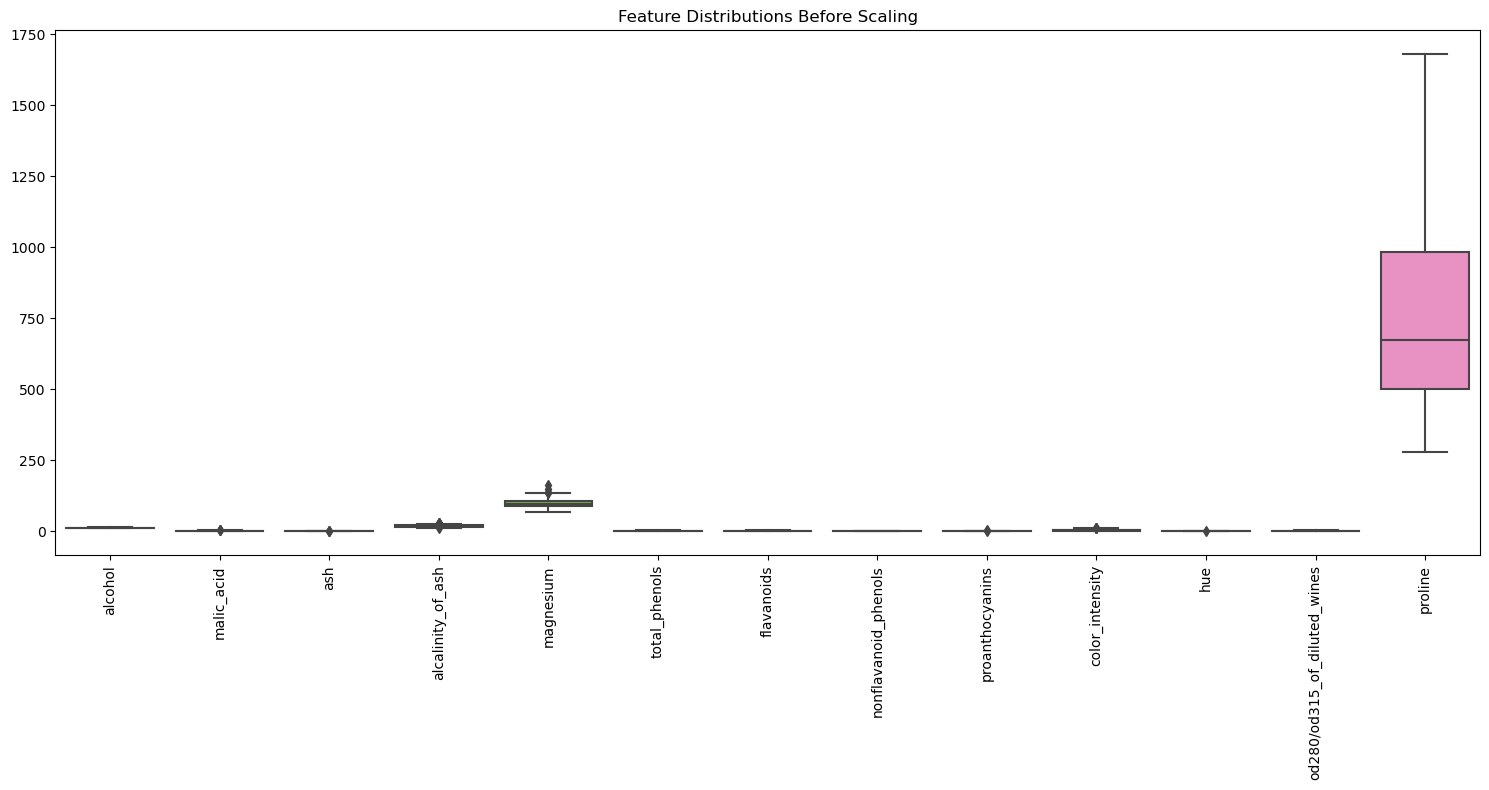

In [23]:
# Before scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Feature Distributions Before Scaling')
plt.tight_layout()
plt.show()

In [27]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

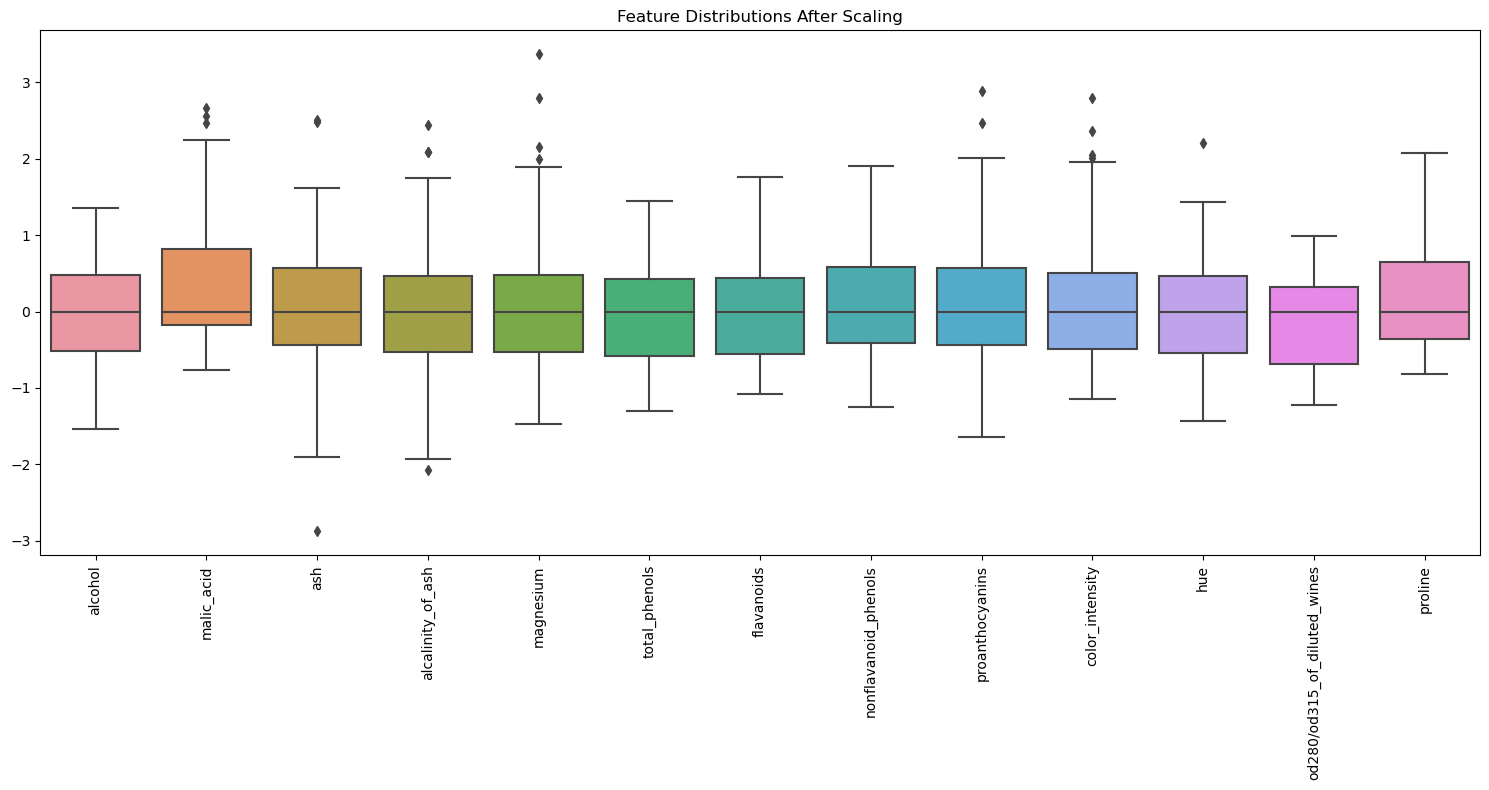

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title('Feature Distributions After Scaling')
plt.tight_layout()
plt.show()

In [30]:
Q1 = X_scaled.quantile(0.25)
Q3 = X_scaled.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers per feature:")
print(outliers)


Number of outliers per feature:
alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


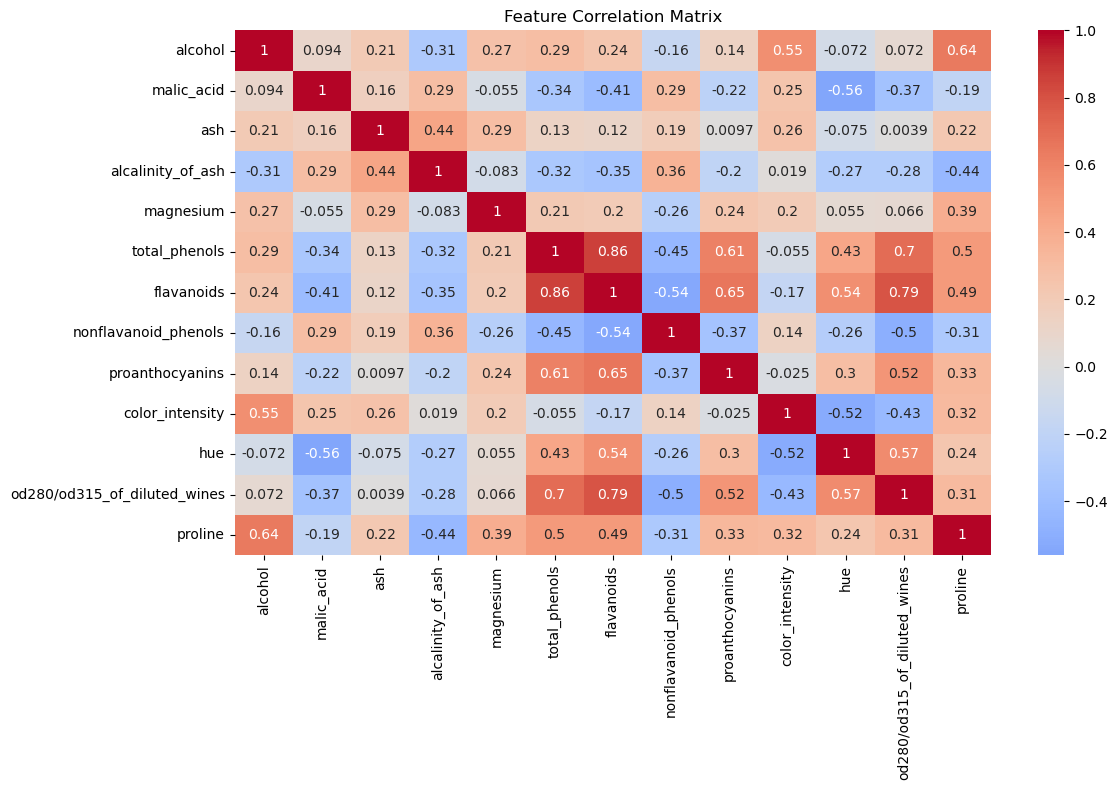

In [32]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()

## Spliting of dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=.2,random_state=42,stratify=y)
print("\nPreprocessing Summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Preprocessing Summary:
Training set shape: (142, 13)
Testing set shape: (36, 13)


In [36]:
print("\nFeature Statistics After Preprocessing:")
X_train.describe().round(2)


Feature Statistics After Preprocessing:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,-0.06,0.32,0.01,0.03,0.09,-0.08,-0.09,0.12,0.06,0.10,-0.05,-0.14,0.14
std,0.61,0.74,0.77,0.79,0.79,0.59,0.57,0.71,0.83,0.78,0.67,0.56,0.62
min,-1.54,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.62,-1.14,-1.44,-1.23,-0.82
25%,-0.52,-0.17,-0.46,-0.53,-0.53,-0.61,-0.54,-0.42,-0.44,-0.55,-0.55,-0.66,-0.37
50%,-0.03,-0.04,0.00,0.00,-0.05,-0.02,0.00,0.00,0.01,-0.02,-0.01,0.00,0.00
75%,0.39,0.88,0.58,0.47,0.51,0.42,0.38,0.54,0.56,0.50,0.37,0.31,0.64
max,1.35,2.66,2.47,2.44,3.37,1.44,0.96,1.73,2.89,2.79,2.21,0.92,1.74


## Model Training

In [37]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

## Model Evalution 

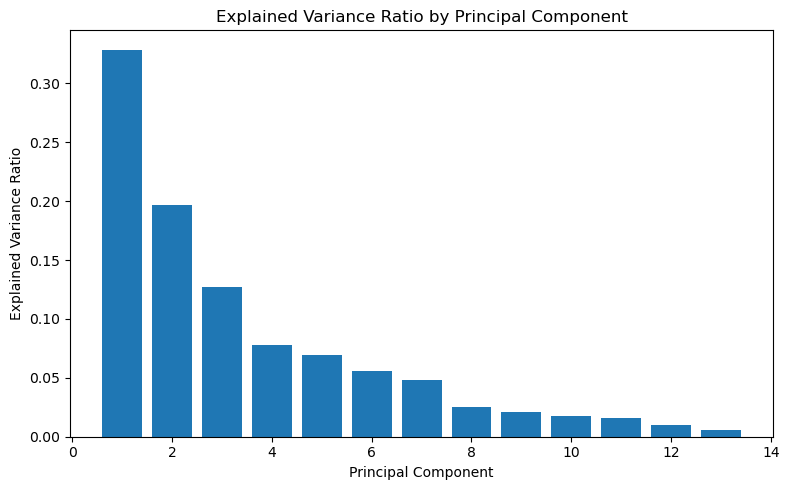

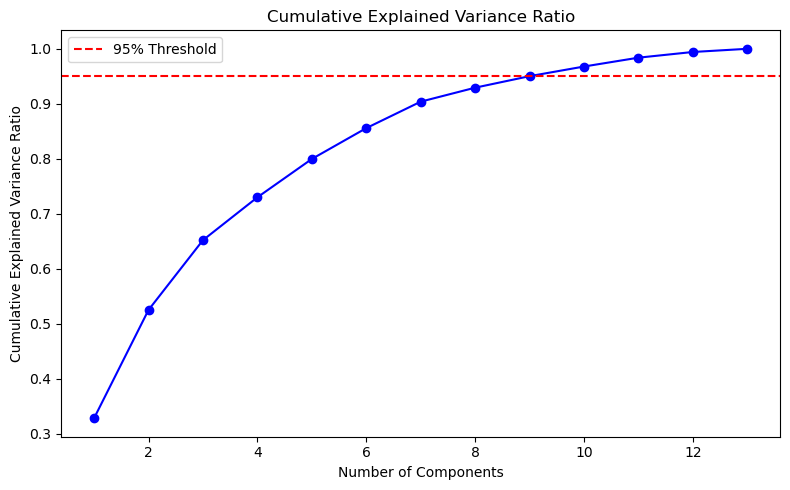

Shape of original data: (178, 13)

Explained variance ratio of first 5 components:
PC1: 0.3285
PC2: 0.1968
PC3: 0.1268
PC4: 0.0779
PC5: 0.0697

Number of components needed for 95% variance: 9
Shape of reduced data: (178, 9)


In [40]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


# Print the results
print("Shape of original data:", X.shape)
print("\nExplained variance ratio of first 5 components:")
for i, ratio in enumerate(explained_variance_ratio[:5], 1):
    print(f"PC{i}: {ratio:.4f}")

# Find number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# Create reduced dataset
pca_95 = PCA(n_components=n_components_95)
X_reduced = pca_95.fit_transform(X_scaled)
print("Shape of reduced data:", X_reduced.shape)